<a href="https://colab.research.google.com/github/GokmenAtakanT/Machine-Learning/blob/main/Cifar10_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 10)        2890      
                                                                 
 dropout (Dropout)           (None, 32, 32, 10)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 10)       40        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 10)        

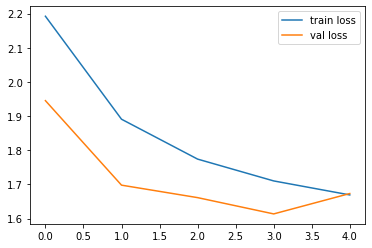

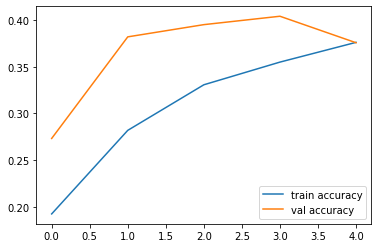

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 28 22:40:09 2019

@author: atakan
"""

import pandas as pd
import numpy  as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
# Set random seed for purposes of reproducibility
seed = 21
from keras.datasets import cifar10
# loading in the data
     
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(10, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(10, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(10, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Conv2D(10, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(10, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(10, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Dense(class_num))
model.add(Activation('softmax'))

epochs = 5
optimizer = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

np.random.seed(seed)
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
pred=model.predict(X_test)
#print("Accuracy: %.2f%%" % (scores[1]*100))
import matplotlib.pyplot as plt

plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history["accuracy"], label = "train accuracy")
plt.plot(hist.history["val_accuracy"], label = "val accuracy")
plt.legend()
plt.show()